<a href="https://colab.research.google.com/github/Sohamch03/Uber-trip-Analysis-in-Python/blob/main/Uber_Trip_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ds= pd.read_csv('/content/UberDataset.csv')

In [ ]:
ds.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
ds.shape

(1156, 7)

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


DATA PREPROCESSING

In [ ]:
ds['PURPOSE'].fillna("NOT",inplace=True)

In [ ]:
ds.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
ds['START_DATE'] = pd.to_datetime(ds['START_DATE'],errors='coerce')
ds['END_DATE'] = pd.to_datetime(ds['END_DATE'],errors='coerce')

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [ ]:
from datetime import datetime
ds['date'] = pd.DatetimeIndex(ds['START_DATE']).date
ds['time'] = pd.DatetimeIndex(ds['START_DATE']).hour

In [ ]:
ds.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [ ]:
ds['day-night'] = pd.cut(x=ds['time'],bins=[0,5,15,19,24],labels=['Morning','Afternoon','Evening','Night'])

In [ ]:
ds.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [ ]:
ds.dropna(inplace = True)

In [ ]:
ds.shape

(420, 9)

DATA VISUALIZATION


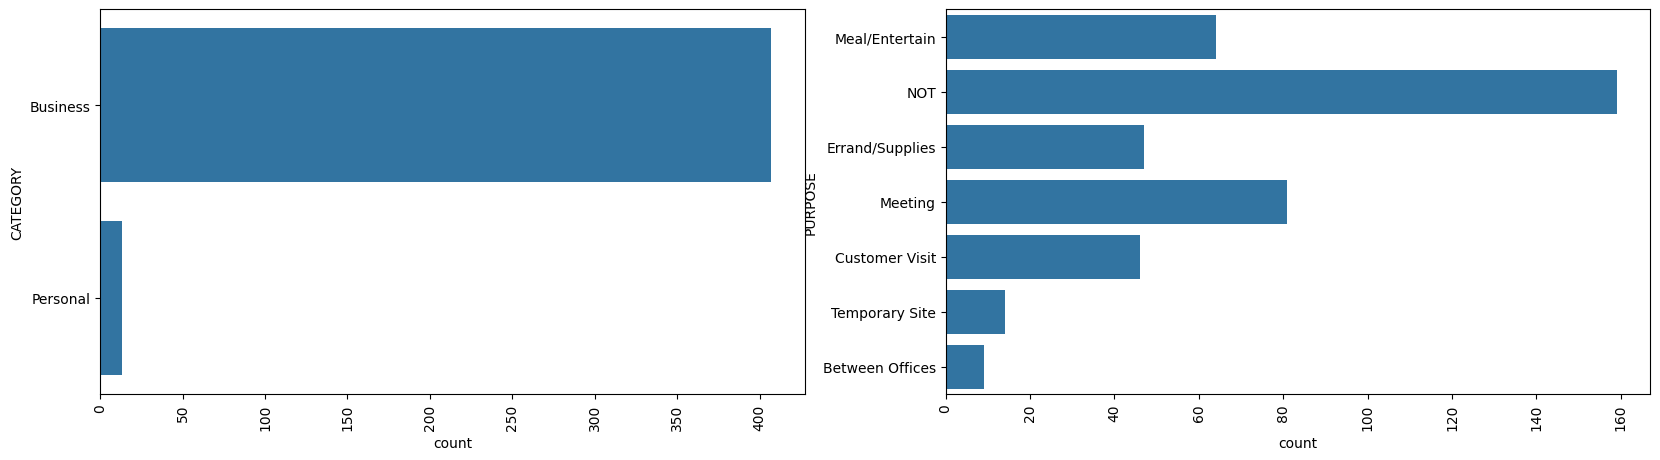

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(ds['CATEGORY'])
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(ds['PURPOSE'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='count', ylabel='day-night'>

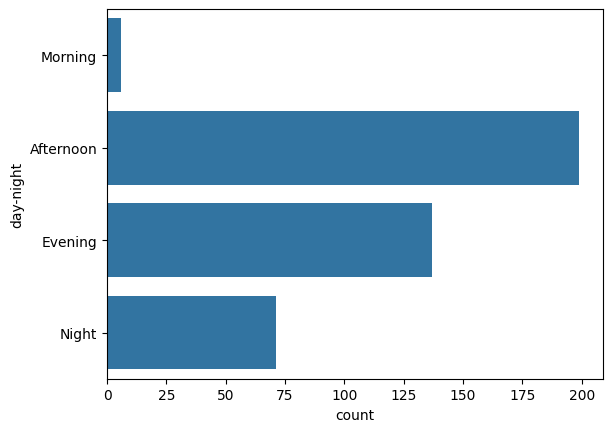

In [ ]:
sns.countplot(ds['day-night'])

In [ ]:
ds['Month'] = pd.DatetimeIndex(ds['START_DATE']).month
month_label = {1.0:"Jan",2.0:"Feb",3.0:"Mar",4.0:"Apr",5.0:"May",6.0:"Jun",7.0:"Jul",8.0:"Aug",9.0:"Sep",10.0:"Oct",11.0:"Nov",12.0:"Dec"}
ds['Month'] = ds['Month'].map(month_label)
mon = ds.Month.value_counts(sort=False)

In [ ]:
ds.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


[Text(0.5, 0, 'Month'), Text(0, 0.5, 'VALUE COUNT')]

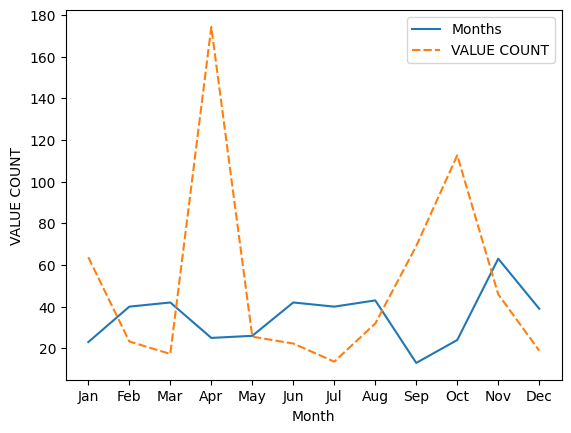

In [ ]:
df = pd.DataFrame({
    "Months": mon.values,
    "VALUE COUNT": ds.groupby('Month', sort=False)['MILES'].max()
})

p = sns.lineplot(data=df)
p.set(xlabel="Month", ylabel="VALUE COUNT")


In [ ]:
df.head()

,MONTHS,VALUE COUNT
Month,,
Jan,23,63.7
Feb,40,23.3
Mar,42,17.3
Apr,24,174.2
May,26,25.6


In [ ]:
ds['day'] = ds.START_DATE.dt.weekday
day_label = {0.0:"Monday",1.0:"Tuesday",2.0:"Wednesday",3.0:"Thursday",4.0:"Friday",5.0:"Saturday",6.0:"Sunday"}
ds['day'] = ds['day'].map(day_label)


In [ ]:
ds.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,Month,day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wednesday


Text(0, 0.5, 'COUNT')

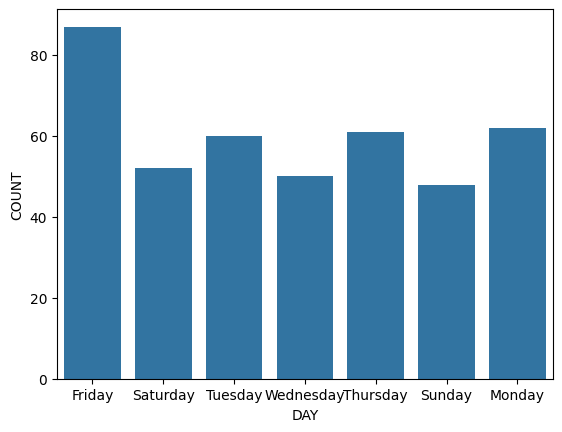

In [ ]:
day_label = ds.day.value_counts(sort=False)
sns.barplot(x=day_label.index,y=day_label)
plt.xlabel('DAY')
plt.ylabel('COUNT')

<Axes: ylabel='MILES'>

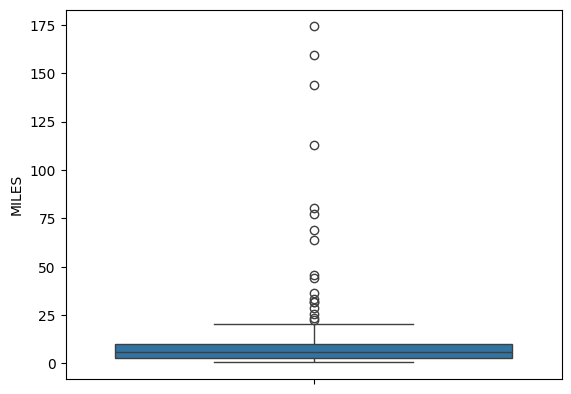

In [ ]:
sns.boxplot(ds['MILES'])

<Axes: ylabel='MILES'>

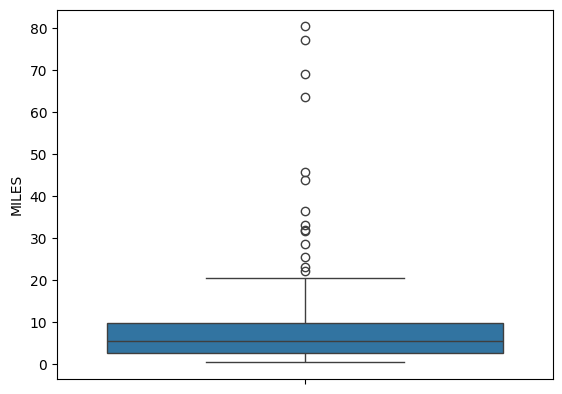

In [ ]:
sns.boxplot(ds[ds['MILES']<100]['MILES'])

<Axes: ylabel='MILES'>

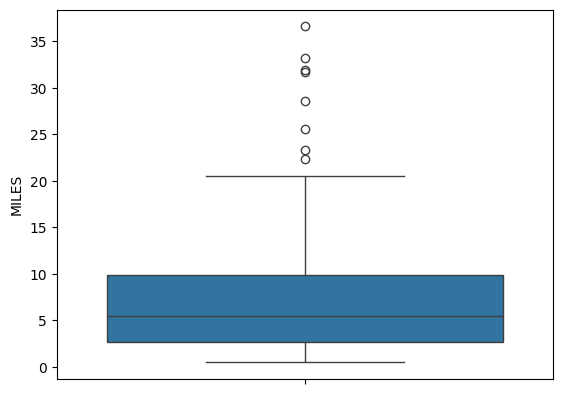

In [ ]:
sns.boxplot(ds[ds['MILES']<40]['MILES'])

<Axes: xlabel='MILES', ylabel='Density'>

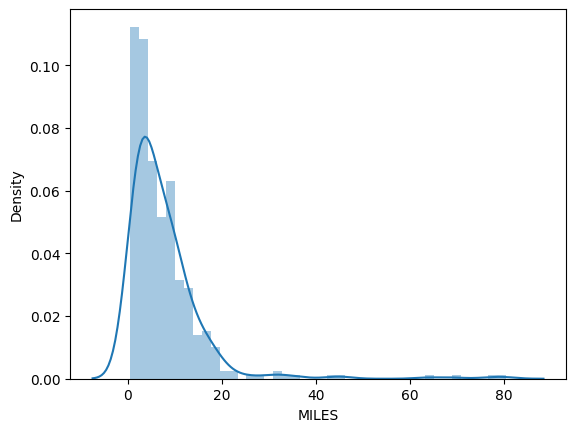

In [ ]:
sns.distplot(ds[ds['MILES']<100]['MILES'])